# Seaborn Categorical Plots Guide

## Overview
Seaborn provides powerful tools for visualizing relationships involving categorical variables. Built-in datasets like `tips` and `titanic` are used for examples.

```python
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")  # Set theme
```

---

## 1. Categorical Scatterplots

### a. `stripplot()`
- Shows individual observations with jitter
- **When to use**: Small datasets, show raw data distribution

```python
sns.stripplot(data=tips, x="day", y="total_bill", hue="sex", jitter=0.2)
plt.title("Strip Plot of Total Bill by Day")
plt.show()
```

### b. `swarmplot()`
- Points arranged to avoid overlap (better for small datasets)
- **When to use**: Alternative to strip plot with better visibility

```python
sns.swarmplot(data=tips, x="day", y="total_bill", hue="smoker", palette="Set2")
```

---

## 2. Categorical Distribution Plots

### a. `boxplot()`
- Shows quartiles, medians, and outliers
- **When to use**: Compare distributions across categories

```python
sns.boxplot(data=tips, x="day", y="total_bill", hue="time", width=0.6)
```

### b. `violinplot()`
- Combines boxplot with KDE
- **When to use**: Show full distribution shape

```python
sns.violinplot(data=tips, x="day", y="total_bill", split=True, hue="sex")
```

---

## 3. Categorical Estimate Plots

### a. `barplot()`
- Shows mean (default) with confidence intervals
- **When to use**: Compare aggregated values

```python
sns.barplot(data=tips, x="day", y="total_bill", hue="sex", ci=95)
```

### b. `pointplot()`
- Emphasizes changes between categories with connecting lines
- **When to use**: Time series or sequential categories

```python
sns.pointplot(data=tips, x="day", y="total_bill", hue="sex", dodge=True)
```

### c. `countplot()`
- Shows category frequencies
- **When to use**: Count observations in each category

```python
sns.countplot(data=titanic, x="class", hue="survived", palette="viridis")
```

---

## 4. Categorical-Categorical Plots

### a. Heatmap
- Requires aggregated data (use `pd.crosstab()`)
- **When to use**: Show relationships between two categorical variables

```python
cross_tab = pd.crosstab(titanic["class"], titanic["alive"])
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="Blues")
```

### b. Clustermap
- Heatmap with hierarchical clustering
- **When to use**: Find patterns in categorical relationships

```python
sns.clustermap(cross_tab, standard_scale=1, cmap="coolwarm")
```

---

## Pro Tips

1. **Faceting**:
   ```python
   g = sns.catplot(
       data=tips, kind="box",
       x="day", y="total_bill",
       col="time", row="smoker"
   )
   ```

2. **Styling**:
   - Themes: `sns.set_style("darkgrid")`
   - Palettes: `palette="husl"`, `palette="rocket_r"`

3. **Combine with Matplotlib**:
   ```python
   fig, ax = plt.subplots(figsize=(10,4))
   sns.swarmplot(..., ax=ax)
   ax.set_title("Custom Title")
   ```

---

## When to Use Which Plot?

| Goal                          | Recommended Plot       |
|-------------------------------|------------------------|
| Show individual observations  | `stripplot`/`swarmplot`|
| Compare distributions         | `boxplot`/`violinplot` |
| Show aggregated values        | `barplot`/`pointplot`  |
| Count categories              | `countplot`            |
| Two categorical variables     | `heatmap`/`clustermap` |

### Relational/Statistical Plots

Relational Plots are used to perform multivariate analysis

1. Scatter Plots (This video)
2. Line Plots (Specifically used for time series data)
3. FacetGrids (Plotting multiple graphs side by side)

### Scatter Plots

The scatter plot is a mainstay of statistical visualization. It depicts the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

![](Seaborn.png)

Although, scatter plot can be plotted for both numerical as well as categorical data, it's mostly used to depict the relationship between numerical data.  

There are 2 ways to draw a scatterplot in Seaborn:  

1. **replot** [Figure Level Function]  
2. **scatterplot** [Axes Level Function]  

As we will see, these visualizations can be quite helpful because they use simple and easily understood representations of data even on complex data by mapping up to three additional variables using the semantics of **hue**, **size**, and **style**.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
data = sns.load_dataset('tips')

In [6]:
data.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


#### Plot a Scatter Plot between total_bill and tip

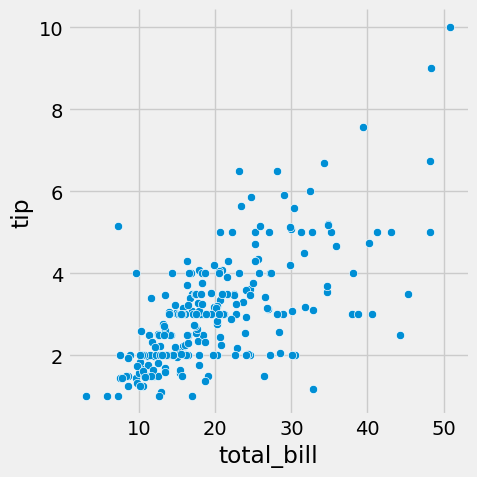

In [8]:
sns.relplot(x='total_bill',y='tip',kind='scatter',data=data)

#### the hue paramenter 

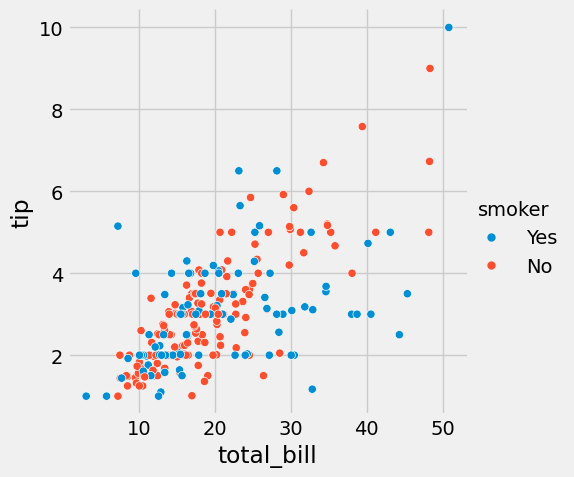

In [9]:
sns.relplot(x='total_bill',y='tip',hue='smoker',data=data)

#### The Style parameter

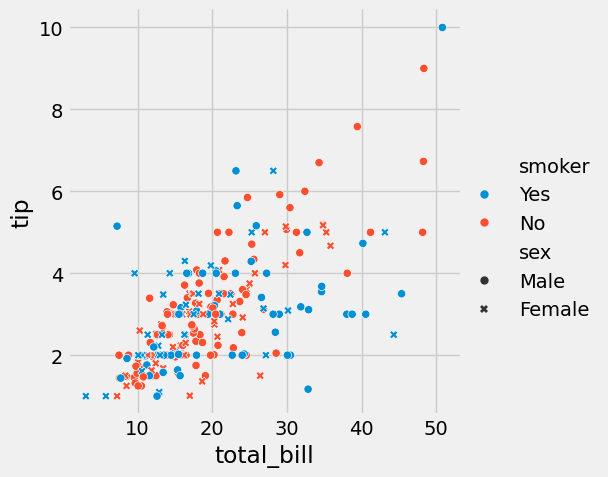

In [10]:
sns.relplot(x='total_bill',y='tip',hue='smoker',style='sex',data=data)

#### The size parameter

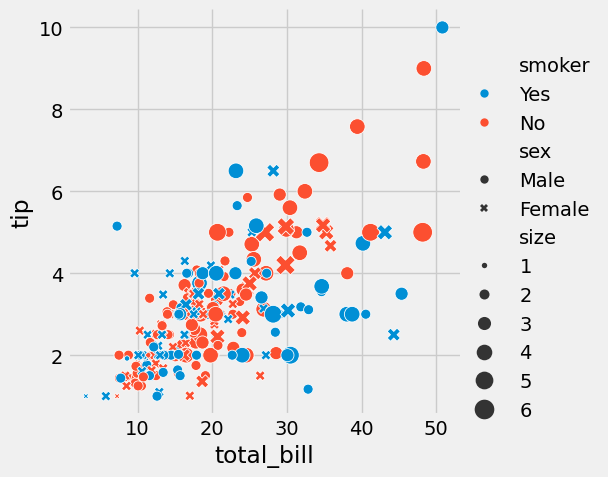

In [14]:
sns.relplot(x='total_bill',y='tip',hue='smoker',style='sex',size='size',sizes=(15,200),data=data)

#### Using the scatterplot function

<Axes: xlabel='total_bill', ylabel='tip'>

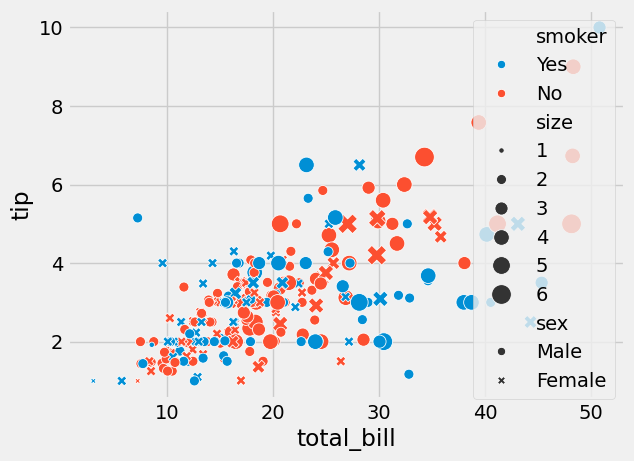

In [17]:
sns.scatterplot(x='total_bill',y='tip',hue='smoker',style='sex',size='size',sizes=(15,200),data=data)

## Plotting with Categorical Data  

### catplot [Figure Level Function]  

1. **Categorical Scatterplots**  
   - a. Stripplot  
   - b. Swarmplot  

2. **Categorical Distribution Plots**  
   - a. Boxplot
   - b. Violinplot 
3. **Categorical estimate plots** 
   - a. pointplot
   - b. Barplot
   - c. Countplot
4. **Catergorical catergorical plots**
   - a. Headtmaps
   - b. clustermaps

In [ ]:
# x-axis -->Categorical data
# y-axis -->Numerical data

#### Categorical Scatterplots

In [2]:
plt.style.use('fivethirtyeight')
tips = sns.load_dataset('tips')

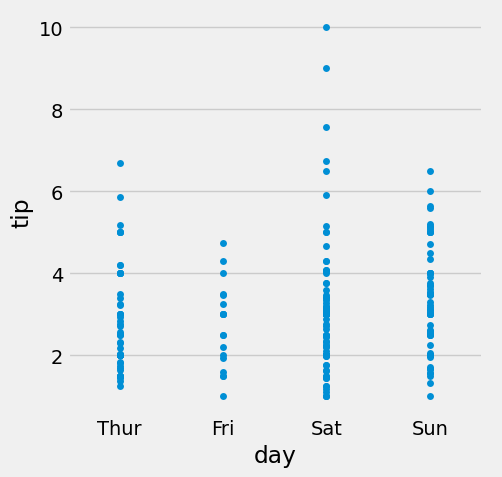

In [3]:
sns.catplot(x='day',y='tip',kind='strip',jitter =0,data=tips) # kind='strip'
# jitter

C:\Users\Adil\AppData\Local\Temp\ipykernel_7844\1746670935.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='day', y='tip', kind='swarm', data=tips, palette='Set2')  # kind= 'swarm'


C:\Users\Adil\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Adil\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


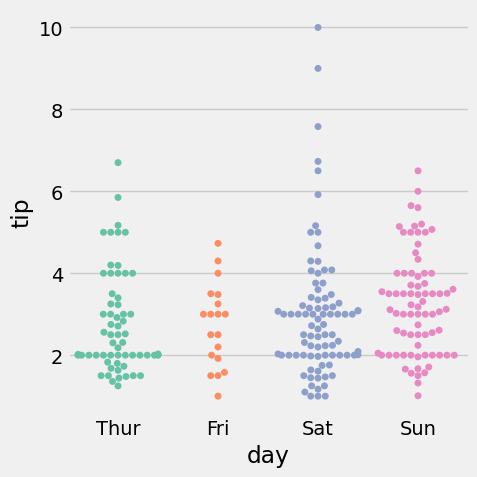

In [5]:
sns.catplot(x='day', y='tip', kind='swarm', data=tips, palette='Set2')  # kind= 'swarm'

C:\Users\Adil\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Adil\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


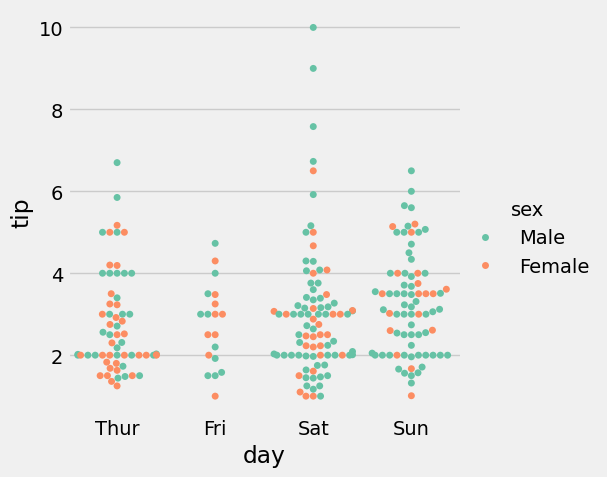

In [8]:
sns.catplot(x='day', y='tip', kind='swarm',hue='sex', data=tips, palette='Set2')

![]( Boxplot.png)
![]( Boxplot1.png)

<Axes: ylabel='total_bill'>

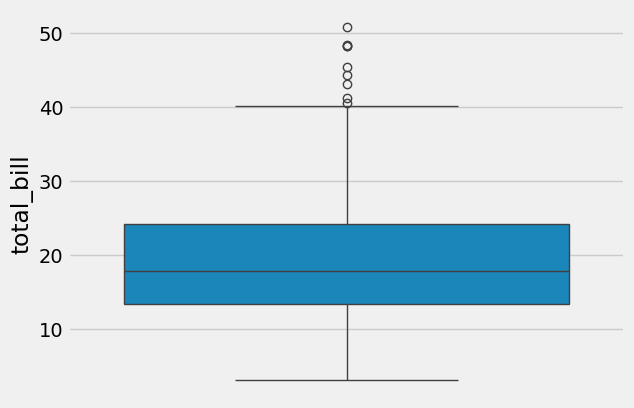

In [11]:
# univariate 
sns.boxplot(tips['total_bill'])

C:\Users\Adil\AppData\Local\Temp\ipykernel_7844\1047505332.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='day',y='total_bill', kind='box', data = tips,palette='Set2')


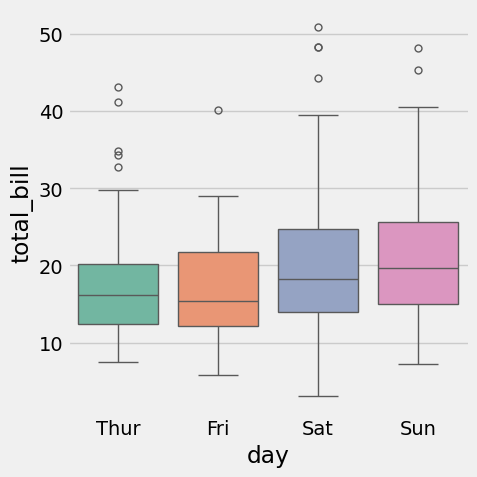

In [14]:
sns.catplot(x='day',y='total_bill', kind='box', data = tips,palette='Set2')

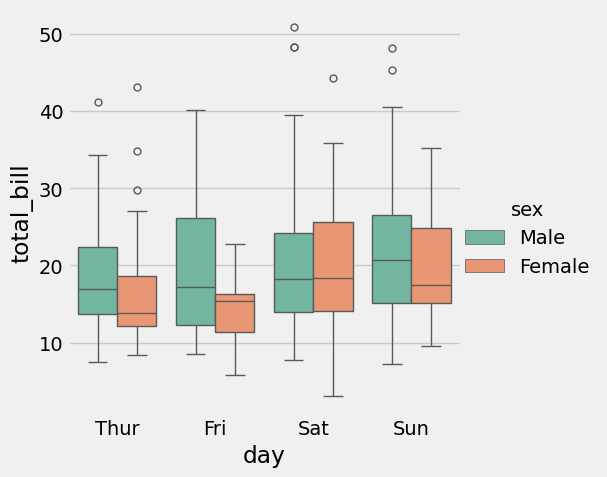

In [16]:
sns.catplot(x='day',y='total_bill', kind='box',hue='sex', data = tips,palette='Set2')

# Violin Plots  

violin plots are a method of plotting numeric data and can be considered a combination of the box plot with a kernel density plot.
![](Violinplots.png)
The unquestionable advantage of the violin plot over the box plot is that aside from showing the abovementioned statistics, it also shows the entire distribution of the data.

Vilolin plots are often used to compare the distrubution of a given variable across some catefories .

<Axes: ylabel='total_bill'>

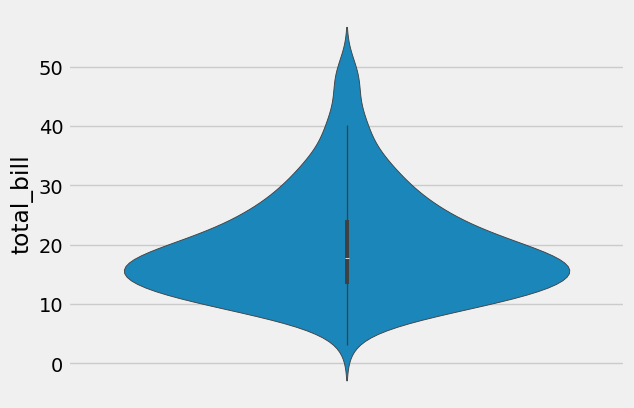

In [17]:
sns.violinplot(tips['total_bill'])

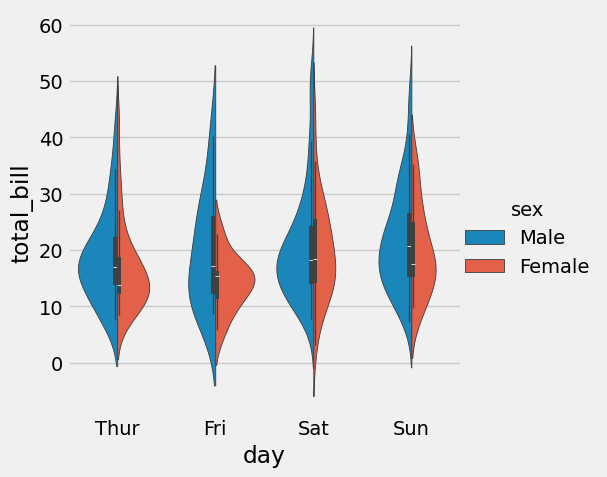

In [18]:
sns.catplot(x='day',y='total_bill',kind='violin', hue ='sex',split=True,data=tips)

### Barplots and Countplots

C:\Users\Adil\AppData\Local\Temp\ipykernel_7844\4161471140.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='smoker',y='total_bill',kind='bar',data=tips,palette='Set2')


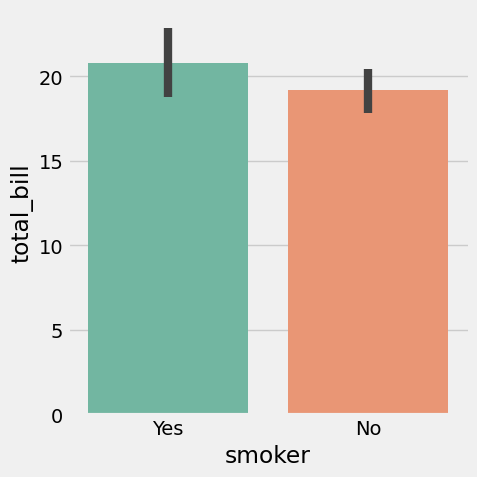

In [20]:
sns.catplot(x='smoker',y='total_bill',kind='bar',data=tips,palette='Set2')

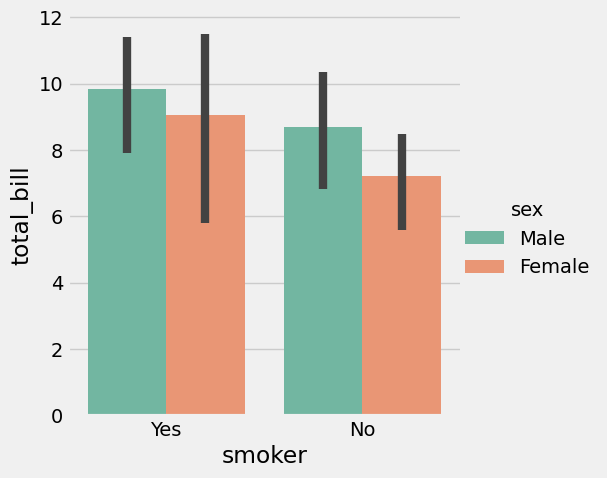

In [22]:
sns.catplot(x='smoker',y='total_bill',hue='sex',estimator=np.std,kind='bar',data=tips,palette='Set2')

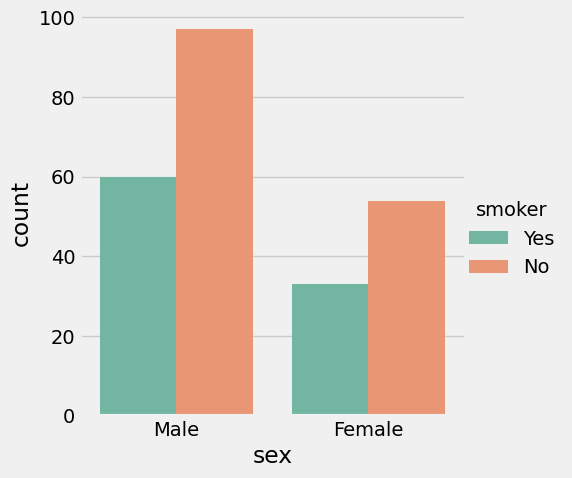

In [26]:
sns.catplot(x='sex',kind='count',hue='smoker',data=tips,palette='Set2')

### Heatmaps  

A heat map is a graphical representation of data where the individual values contained in a matrix are represented as colors.

In [27]:
flights = sns.load_dataset('flights')

In [30]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [33]:
x=flights.pivot_table(index='year', columns='month', values = 'passengers',aggfunc='sum')

C:\Users\Adil\AppData\Local\Temp\ipykernel_7844\3521776641.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  x=flights.pivot_table(index='year', columns='month', values = 'passengers',aggfunc='sum')


<Axes: xlabel='month', ylabel='year'>

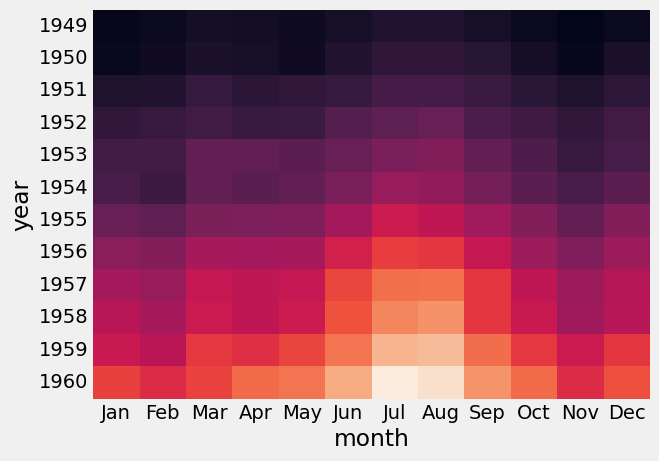

In [36]:
 sns.heatmap(x,cbar=False)

<Axes: xlabel='month', ylabel='year'>

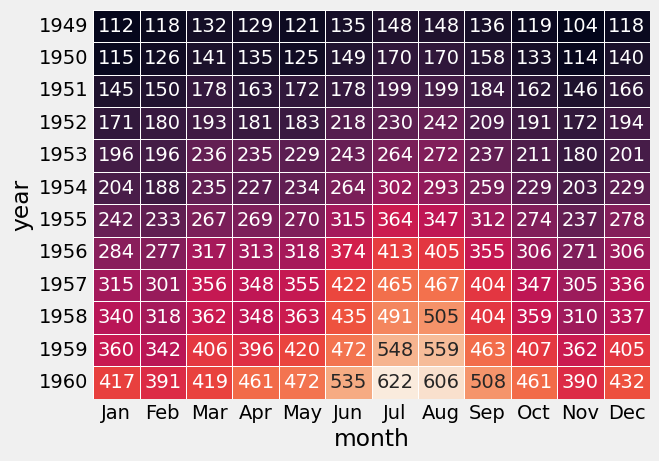

In [38]:
 sns.heatmap(x,cbar=False,linewidths=0.5,annot=True,fmt='d')

<Axes: xlabel='month', ylabel='year'>

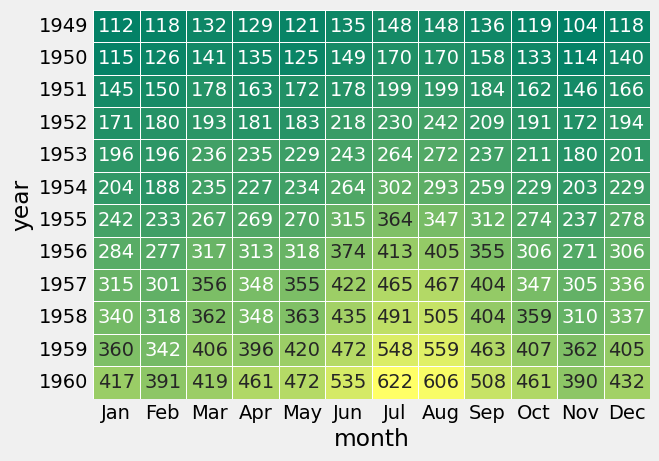

In [39]:
 sns.heatmap(x,cbar=False,linewidths=0.5,annot=True,fmt='d',cmap='summer')

### Jointplot  

Jointplot creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.  

We can use Jointplots in the following 4 manners:  

1. ScatterPlots  
2. Hexbin Plots  
3. KdePlots  
4. RegPlots

In [4]:
import seaborn as sns
tips = sns.load_dataset('tips')

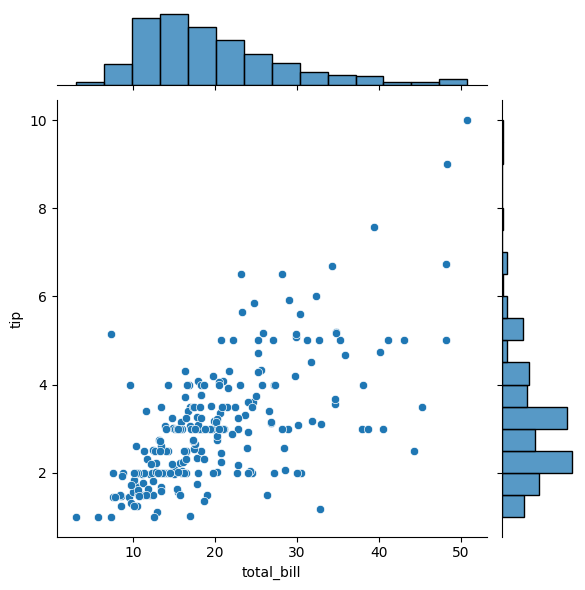

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips)

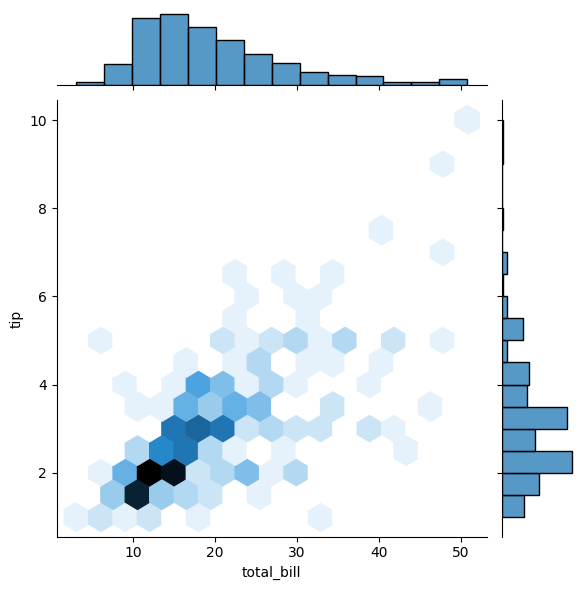

In [7]:
sns.jointplot(x='total_bill',y='tip',kind='hex',data=tips)

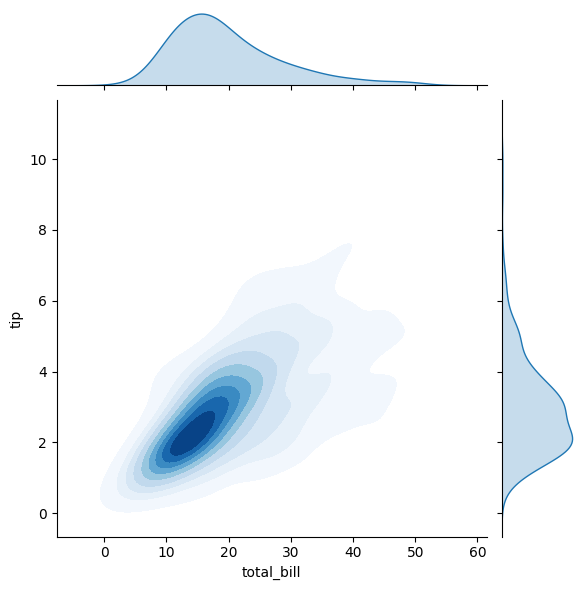

In [15]:
# sns.jointplot(x='total_bill',y='tip',kind='kde',data=tips,palette='Set2')
sns.jointplot(x='total_bill', y='tip', kind='kde', data=tips, cmap='Blues', fill=True)

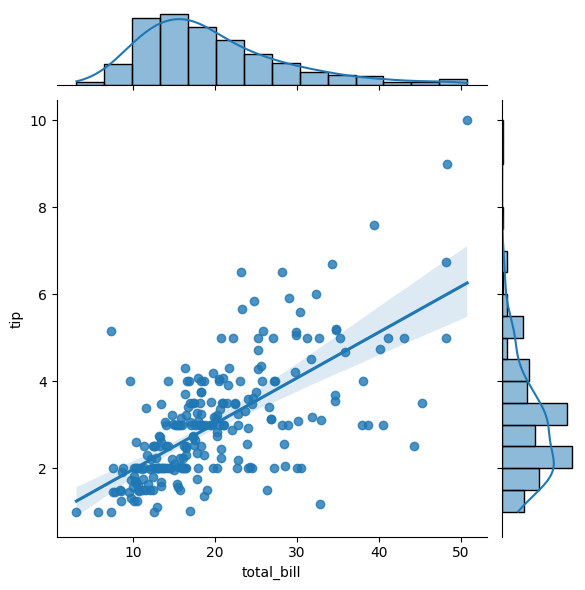

In [19]:
sns.jointplot(x='total_bill',y='tip',kind='reg',data=tips)

### Pairplots  

Pairplots are used to plot multiple pairwise bivariate distributions in a dataset. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal axes.

In [20]:
iris = sns.load_dataset('iris')

In [22]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


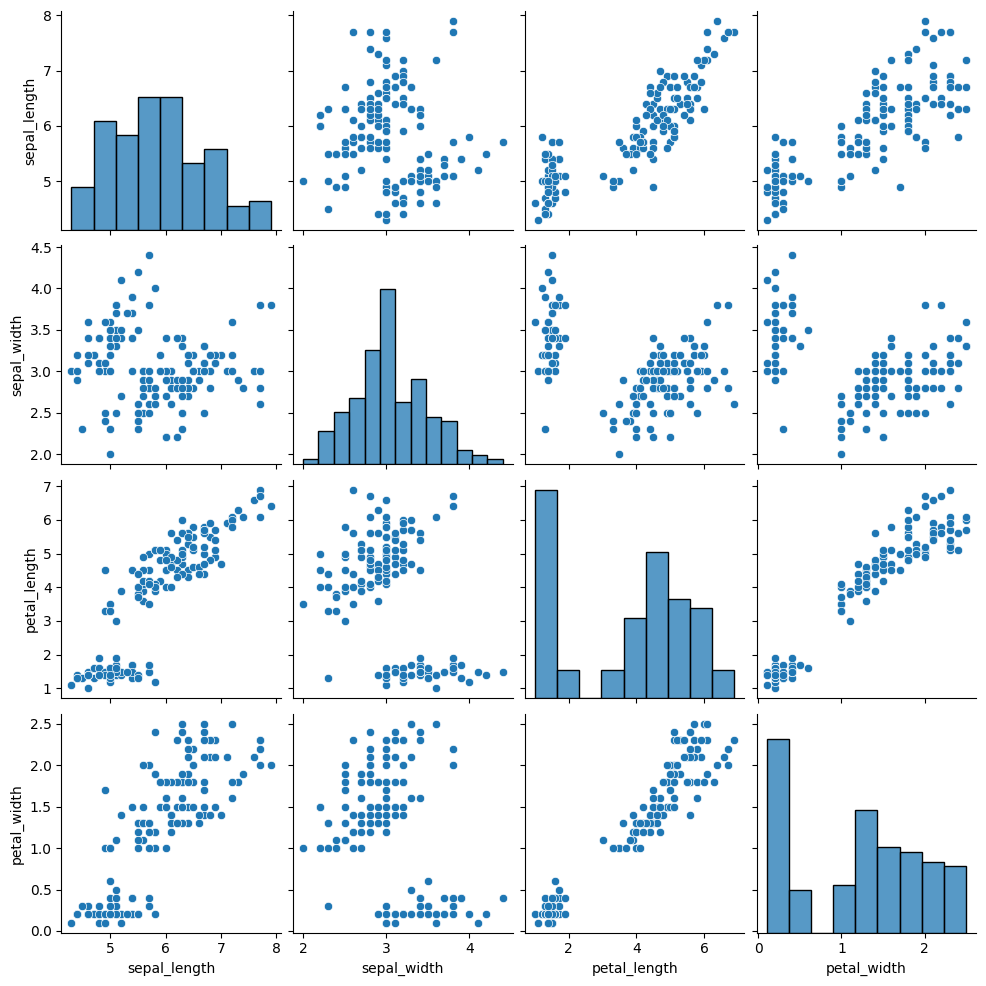

In [23]:
sns.pairplot(iris)

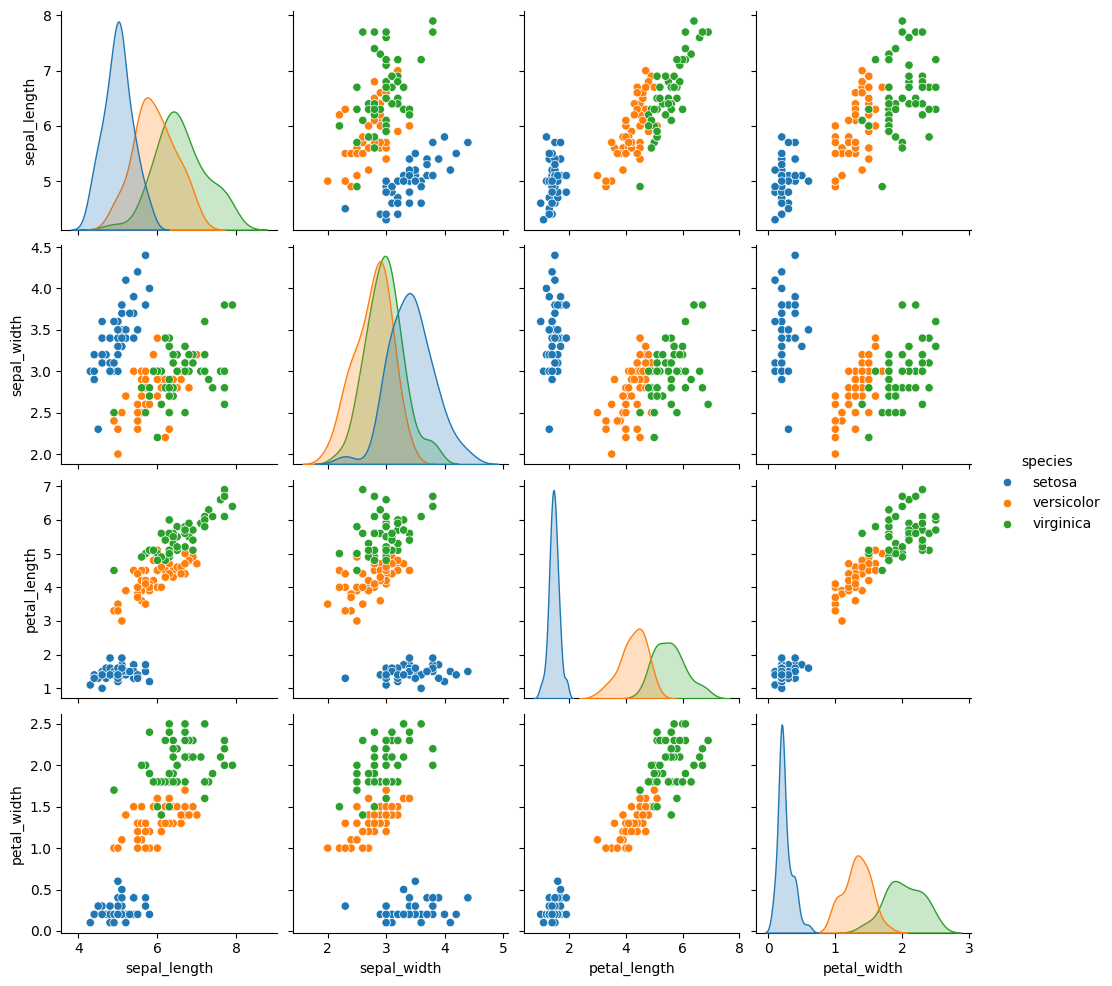

In [24]:
sns.pairplot(iris,hue='species')

### Distplots  

Distplots are used to do univariate analysis on continuous/numerical data.  

Distplot combines 3 things in one graph:  

1. Histogram  
2. Kernel Density Estimation (PDF)  
3. Rugplot

In [25]:
titanic = sns.load_dataset('titanic')

In [27]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
titanic['age'].fillna(titanic['age'].mean(), inplace= True) 

C:\Users\Adil\AppData\Local\Temp\ipykernel_12004\2853238531.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].mean(), inplace= True)


***Plotting a Distplot***

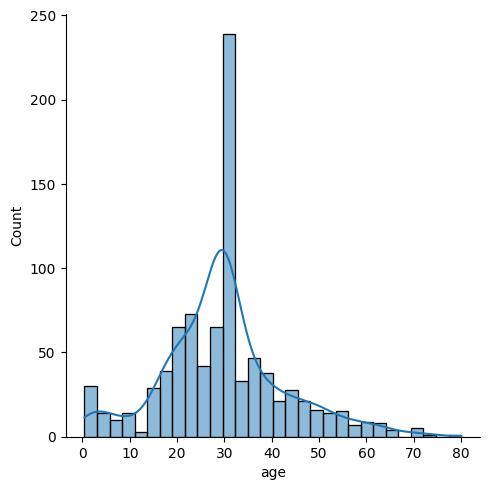

In [34]:
sns.displot(titanic['age'],kde=True)

***plotting   only the histogram***    

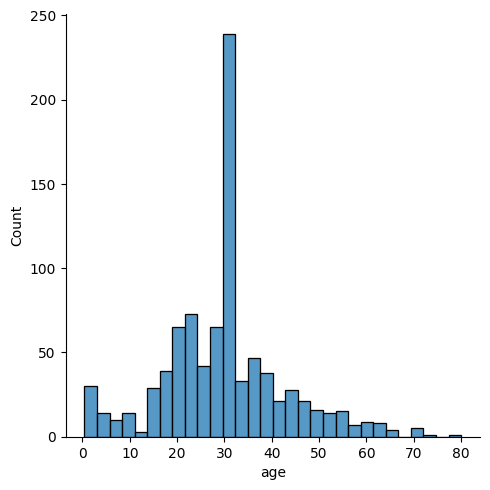

In [37]:
sns.displot(titanic['age'])

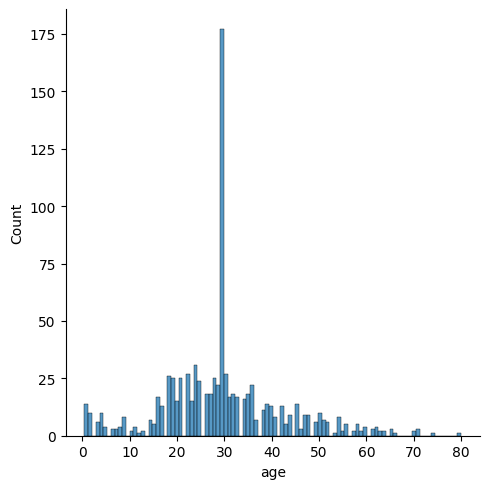

In [38]:
sns.displot(titanic['age'],bins=100,)

***plotting only the KDE***

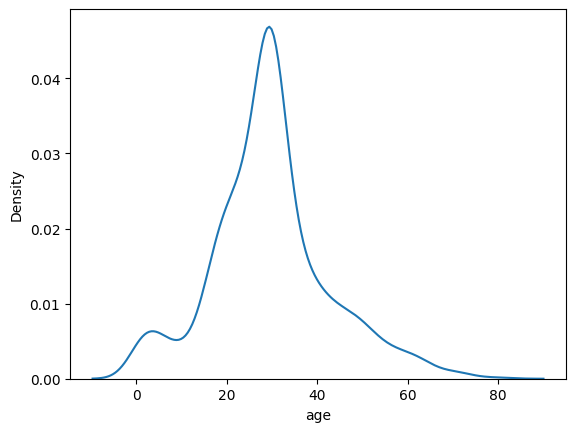

In [43]:
sns.kdeplot(titanic['age'])  
plt.show()  

***plotting only the Rugplot***

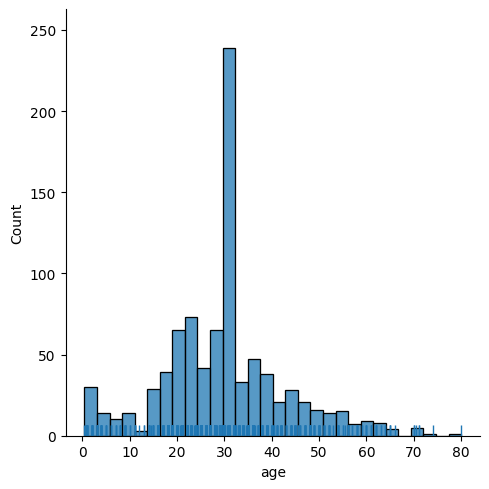

In [47]:
 sns.displot(titanic['age'], kde=False, rug=True) 

**How to use Distplot** 

C:\Users\Adil\AppData\Local\Temp\ipykernel_12004\2669285119.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['survived']==1]['age'])
C:\Users\Adil\AppData\Local\Temp\ipykernel_12004\2669285119.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['survived']==0][

<Axes: xlabel='age', ylabel='Density'>

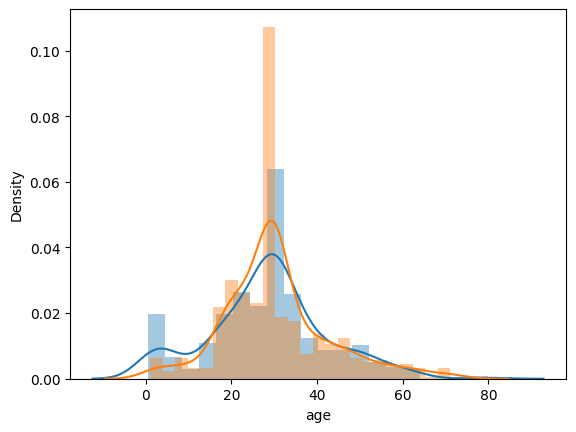

In [50]:
sns.distplot(titanic[titanic['survived']==1]['age'])
sns.distplot(titanic[titanic['survived']==0]['age'])